In [1]:
#Maximum Text length 280 Chars
# Short  <=120
# Mid  <= 230
# Long <= 280

#DeepGeo-> Check length for every tweet, and put in corresponding category
#       -> Take all Tweets for each category and calculate accuracy

#GeoLocation ->If user has 1 tweet -> put in corresponding category
#            -> else, split tweets and calculate average text length for the user
#            -> Take all user for each category and calculate accuracy




In [2]:
#DeepGeo and DeepGeo + Noise
import json
import csv
from geopy.distance import distance

# Get predictions from file "deepGeo" or "deepGeo+Noise"
model="deepGeo+Noise"

pathResults="C:/Users/dennis/Desktop/dataTestTrain/results/"+model+".csv"
dResults={}
with open (pathResults, encoding="utf8") as results:
    for line in results:
        data = line.split(";")
        tweetID=data[0]
        prediction=str(data[1])
        dResults[tweetID]=prediction 

# GroundTruth data
labels={}
pathLabels="C:/Users/dennis/Desktop/dataTestTrain/deepGeoTestGroundTruth.csv"
with open(pathLabels,encoding="utf8") as labelData:
    for line in labelData:
        data = line.split(";")
        tweetID=data[0]
        label=str(data[1]).replace("\n","")
        label=label.replace(" ","")
        label=label[1:-1]
        labels[tweetID]=label
        
# Get Text Length from DeepGeo inputfile and categorise tweets
pathTrainData="C:/Users/dennis/Desktop/dataTestTrain/deepGeo/deepGeoUser.test"
shortTweets = []
midTweets = []
longTweets =[]

with open(pathTrainData,encoding="utf8") as file:
    for line in file:
        tweet = json.loads(line)
        if len(tweet["text"])<120:
            shortTweets.append(tweet["hashed_tweet_id"])
        elif len(tweet["text"])<230:
            midTweets.append(tweet["hashed_tweet_id"])
        else:
            longTweets.append(tweet["hashed_tweet_id"])
        
print(len(shortTweets))
print(len(midTweets))
print(len(longTweets))

print( len(shortTweets)+len(midTweets)+len(longTweets)  )        


#Calculate accuracy for short Tweets
distances=[]

for tweet,predict in dResults.items():
    if tweet in shortTweets:
        groundTruth=labels[tweet]
        distances.append(int(round(distance(predict,groundTruth).km)))

lDistances = sorted(distances)
length=len(distances)
index=int(length/2)

print("*************************************")
print("Short Tweets")
print(model+" results:")
print("Number Distances "+str(len(lDistances)))
print("")
avg  = int ( sum(distances)/len(distances))
print("Mean is "+str(avg)+"km")
median = lDistances[index]
print("Median is "+str(median)+"km")
acc_at_161 = 100 * len([d for d in lDistances if d < 161]) / float(len(lDistances))
print("acc@161 is "+str(acc_at_161))
print("*************************************")



#Calculate accuracy for mid Tweets
distances=[]

for tweet,predict in dResults.items():
    if tweet in midTweets:
        groundTruth=labels[tweet]
        distances.append(int(round(distance(predict,groundTruth).km)))

lDistances = sorted(distances)
length=len(distances)
index=int(length/2)

print("*************************************")
print("Mid Tweets")
print(model+" results:")
print("Number Distances "+str(len(lDistances)))
print("")
avg  = int ( sum(distances)/len(distances))
print("Mean is "+str(avg)+"km")
median = lDistances[index]
print("Median is "+str(median)+"km")
acc_at_161 = 100 * len([d for d in lDistances if d < 161]) / float(len(lDistances))
print("acc@161 is "+str(acc_at_161))
print("*************************************")


#Calculate accuracy for long Tweets
distances=[]

for tweet,predict in dResults.items():
    if tweet in longTweets:
        groundTruth=labels[tweet]
        distances.append(int(round(distance(predict,groundTruth).km)))

lDistances = sorted(distances)
length=len(distances)
index=int(length/2)

print("*************************************")
print("Long Tweets")
print(model+" results:")
print("Number Distances "+str(len(lDistances)))
print("")
avg  = int ( sum(distances)/len(distances))
print("Mean is "+str(avg)+"km")
median = lDistances[index]
print("Median is "+str(median)+"km")
acc_at_161 = 100 * len([d for d in lDistances if d < 161]) / (len(lDistances))
print("acc@161 is "+str(acc_at_161))
print("*************************************")

14502
14862
15332
44696
*************************************
Short Tweets
deepGeo+Noise results:
Number Distances 14502

Mean is 2177km
Median is 315km
acc@161 is 44.78003034064267
*************************************
*************************************
Mid Tweets
deepGeo+Noise results:
Number Distances 14862

Mean is 1964km
Median is 187km
acc@161 is 49.044543130130535
*************************************
*************************************
Long Tweets
deepGeo+Noise results:
Number Distances 15332

Mean is 2112km
Median is 163km
acc@161 is 49.88259848682494
*************************************


In [8]:
# Evaluating Results for HomeLocation prediction GeoLocation Models
# geoLocText ,  geoLocLP and geoLocHybrid( results has brackets)

import csv
from geopy.distance import distance

model="geoLocHybrid"


# Get predictions from file geolocation models
# !geoLocLP and geoLocHybrid( results have brackets)!
pathResults="C:/Users/dennis/Desktop/dataTestTrain/results/"+model+".csv"
predictions={}
with open (pathResults, encoding="utf8") as results:
    for line in results:
        data = line.split(";")
        user=data[0]
        predict=str(data[1])

        if model=="geoLocLP" or "geoLocHybrid":
            predict= predict.replace("[","")
            predict= predict.replace("]","")

        predictions[user]=predict 


# GroundTruth data
pathLabel= "C:/Users/dennis/Desktop/dataTestTrain/userLabel.csv"
labels={}
with open(pathLabel,encoding="utf8") as fileLabels:
    for line in fileLabels:
        data = line.split(";")
        user=data[0]
        label=str(data[1])
        labels[user]=label


# Get Text Lengths from GeoLocation input file and categorise average tweet length for every user

shortTweets = []
midTweets = []
longTweets =[]

pathInput= "C:/Users/dennis/Desktop/dataTestTrain/geolocation/geolocationUsertest.test"
with open(pathInput,encoding="utf8") as fileInput:
    for line in fileInput:
        # every line consists of user id ||| concatenation of tweet texts
        line=line.replace("\n","")
        # Split  line by "  |||  " , if len(line)<= 2 -> only 1 text -> categorise this text
        data = line.split("  |||  ")
        user= data[0].split("\t")[0].replace(" ","")
        if len(data)==1:
            print(data)
        if len(data)==2:
            textLength=len(str(data[1]))
        # user has multiple tweets -> calculate average text length
        else:
            sumTweetsLength=0
            for tweet in data[1:]:
                sumTweetsLength+=len(tweet)
            textLength=sumTweetsLength/len(data[1:])
        if textLength<120:
            shortTweets.append(user)
        elif textLength<230:
            midTweets.append(user)
        else:
            longTweets.append(user)

        
print(len(shortTweets))
print(len(midTweets))
print(len(longTweets))

print(len(shortTweets)+len(midTweets)+len(longTweets))
print("******************ACCURACY******************************")
distances=[]
for user,predict in predictions.items():
    if user in shortTweets:
        label=labels[user]
        distances.append(int(round(distance(label,predict).km)))
           
lDistances = sorted(distances)
length=len(distances)
index=int(length/2)



print("Short Tweets")
print(model+" results:")
avg  = int ( sum(distances)/len(distances))
print("Mean is "+str(avg)+"km")
median = lDistances[index]
print("Median is "+str(median)+"km")
acc_at_161 = 100 * len([d for d in lDistances if d < 161]) / float(len(lDistances))
print("acc@161 is "+str(acc_at_161))

print("******************************************************************************************")

distances=[]
for user,predict in predictions.items():
    if user in midTweets:
        label=labels[user]
        distances.append(int(round(distance(label,predict).km)))
           
lDistances = sorted(distances)
length=len(distances)
index=int(length/2)

print("Mid Tweets")
print(model+" results:")
avg  = int ( sum(distances)/len(distances))
print("Mean is "+str(avg)+"km")
median = lDistances[index]
print("Median is "+str(median)+"km")
acc_at_161 = 100 * len([d for d in lDistances if d < 161]) / float(len(lDistances))
print("acc@161 is "+str(acc_at_161))

print("******************************************************************************************")

distances=[]
for user,predict in predictions.items():
    if user in longTweets:
        label=labels[user]
        distances.append(int(round(distance(label,predict).km)))
           
lDistances = sorted(distances)
length=len(distances)
index=int(length/2)

print("Long Tweets")
print(model+" results:")
avg  = int ( sum(distances)/len(distances))
print("Mean is "+str(avg)+"km")
median = lDistances[index]
print("Median is "+str(median)+"km")
acc_at_161 = 100 * len([d for d in lDistances if d < 161]) / float(len(lDistances))
print("acc@161 is "+str(acc_at_161))

8485
10147
10949
29581
******************ACCURACY******************************
Short Tweets
geoLocHybrid results:
Mean is 5221km
Median is 3308km
acc@161 is 6.2227460223924576
******************************************************************************************
Mid Tweets
geoLocHybrid results:
Mean is 4798km
Median is 2792km
acc@161 is 10.367596333891791
******************************************************************************************
Long Tweets
geoLocHybrid results:
Mean is 4726km
Median is 2788km
acc@161 is 11.590099552470546


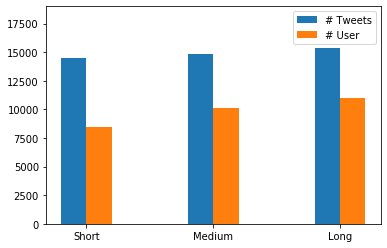

In [27]:
# Split 90-180-280 Tweetslength
#tweets per category
#All: 44696
#Short: 9273
#Medium: 14132
#Long: 21291

#user per category
#All: 29581
#Short: 5218
#Medium: 9306
#Long: 15057

#Split  120-230-280 Tweetslength
#tweets
#Short: 14502
#Medium: 14862
#Long:   15332

#user
#Short: 8485
#Medium: 10147
#Long: 10949
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

listTweets=[14502,14862,15332]
listUser=[8485,10147,10949]
listCategory=["Short","Medium","Long"]


x = np.arange(len(listCategory))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x - width/2, listTweets, width, label='# Tweets')
ax.bar(x + width/2, listUser, width, label='# User')
#ax.set_ylabel('Count')
#ax.set_title('Monthly Tweet Distribution')
ax.set_xticks(x)
ax.set_xticklabels(listCategory, fontsize=10)
ax.legend()

#fig.tight_layout()
ax.set_ylim(top=19000)
plt.show()

In [28]:

fig.savefig('C:/Users/dennis/Desktop/categoriesTextLenth.jpg')
